# Chapter 06 Exercises

## Name goes here

### Date

In [3]:
# Insert the Python Libraries You Will Need Here:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Q1) Implementing the Romer Model using Python

Unlike the Solow Model, the Romer model incorporates the difference between ideas and ojects into the model. Ideas play a big role in sustained growth as illustrated by this homework.

### Part I

| Description             | Formula                           |
|-------------------------|-----------------------------------|
| Unknowns/endogenous variables:     | $Y_t$, $A_t$, $L_{yt}$, $L_{at}$| 
| Output Production Function: | $Y_t = A_tL_{yt}$|
| Idea Production Function:   | $\Delta A_{t+1}=\bar{z}A_tL_{at}$ |
| Resource Constraint: | $L_{yt}+L_{at}=\bar{L}$ |
| Allocation of Labor: | $L_{at} = \bar{\ell}\bar{L}$ |
| Parameters: | $\bar{z}, \bar{L}, \bar{\ell}, \bar{A_0}$ |

Suppose the parameters of the Romer model take the following values: $\bar{A_0} = 100$, $\bar{\ell} = 0.10$, $\bar{z} = \frac{1}{500}$, and $\bar{L} = 100$.

__(a):__ What is the growth rate of output per person in this economy? Please show your work.

__(b):__ What is the initial level of output per person? See equation 6.9 (pg. 149 of the textbook)

__(c):__ Use the Romer framework to model output per person over 80 years and make two time series plots, one in the level scale and another using the ratio scale. (_Hint_: We did exactlythe same thing in the homework for Chapter 5. See Q5) part (c))

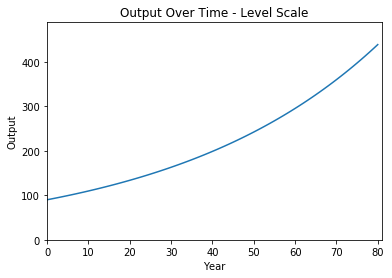

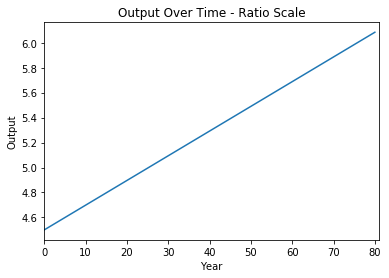

In [4]:
# Model Parameters

A0 = 100
l_bar = 0.1
z_bar = 1/500
L_bar = 100


# Use a lambda function for output and call it using a for loop

output = lambda A0, z_bar, l_bar, L_bar, t: A0 * (1 - l_bar) * ((1 + z_bar*L_bar*l_bar)**t)


##############################################################################
# Make a for loop to calculate the production for each year

output_array = np.zeros(81) # An array full of zeros, this is storage for data in the loop

# Using a for loop to calcuate the rest of the years 1-80. 
# Remember when using range(0:80) endpoints are not included, thus it will not reach year 80 unless you do
# range(0, 81)

for i in range(0,81):
    t = i
    output_array[i] = output(A0, z_bar, l_bar, L_bar, t)
###############################################################################


# Make the plots



__(d):__ Suppose the share or workers dedicated to research were to double at $t=40$. Please answer __(a)__ and __(b)__ using this new information? Add this change to the graphs of part __(c)__. You will now have two 80-year paths for each variable on one plot. Make sure your time series for this question has a different color and that your plot includes a legend indicating which parameter values belong to which variable path. Please discuss the effect on output generated by the change in the allocation of labor in this economy.

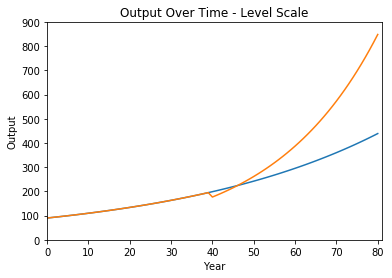

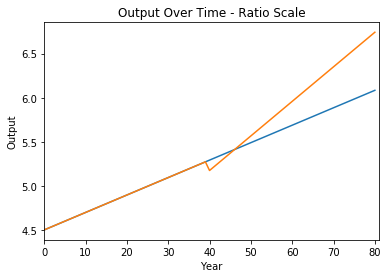

In [5]:
# Defining new research labor share

l_bar2 = (l_bar * 2) 

##########################################################################
# Part (a): find the growth rate
##########################################################################



##########################################################################
# Part (b): The initial level of output per person
##########################################################################



##########################################################################
# Part (c): Make a plot of 80 years of output
##########################################################################

# Allocate new array
output_array2 = np.zeros(81)

# To simulate the change in the research share we have to be very careful about timing.
# At period 40 the research share will change the level of output immediately. It will
# also change the growth rate of output from period 40 onward.  In essence it creates 
# another time series, independent from the previous one. Instead of creating
# two time series and joining them like I did in HW Ch5 I've used
# an 'if' statment inside of the loop. It's business as usual from periods 1-39. However
# in period 40 the research share changes both the level of output, and the growth rate of output.
# Note I kept the value of TFP fom period 40 to start the new series.

for i in range(0, 81):
    t = i
    if t < 40:
        output_array2[i] = output(A0, z_bar, l_bar, L_bar, t)
    else:
        A40=A0 * (1+l_bar * L_bar * z_bar) ** 40
        output_array2[i] = output(A40, z_bar, l_bar2, L_bar, t-40)


# Make the plots

year = np.arange(0, output_array.size, 1) # This is just used to make a nice array for the x axis       

plt.plot(year, output_array, label = 'Growth = 2%')
plt.plot(year, output_array2, label = 'Growth = 4%')
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Level Scale')
plt.ylim(0, np.max(output_array2)+50)  
plt.xlim(0, year.size) 
plt.show()

plt.plot(year, np.log(output_array), label = 'Growth = 2%')
plt.plot(year, np.log(output_array2))
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Ratio Scale')
plt.xlim(0, year.size) 
plt.show()


### Part II

Now suppose the parameters of the model take the following values $\bar{A_0} = 100$, $\bar{\ell} = 0.06$, $\bar{z} = \frac{1}{3000}$, and $\bar{L} = 1000$. Use Python to answer __(a)__ through __(c)__.

__(a):__ What is the growth rate of output per person in this economy? What is the initial level of output per person?

__(b):__  Use the Romer framework to model output per person over 80 years and make a time series plot using the _levels_ scale.

__(c):__ Now add to your plot from part __(b)__ the following changes one at a time: a doubling of the stock of knowledge $\bar{A}_{20}$ at $t=20$, an increase of the research share $\bar{\ell}$ by 150% at $t=30$, double the research productivity $\bar{z}$ at $t=40$, and a doubling of the population $\bar{L}$ at $t=60$. You should now have a total of 5 separate time series on the same plot. Make sure each line has a different color and your plot has a legend indicating which path represents which change. Please, make sure to include the growth rate of output per person after the change in the legend for each scenario.

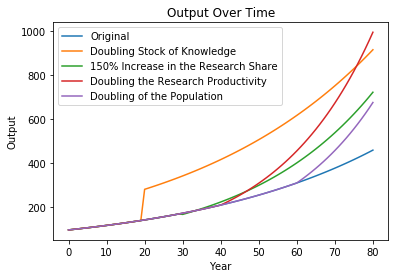

__(d):__ Now you have a framework to conduct quantitative experiments at different time frames with different variables. Play around with each event and suggest which change to the model would result in the greatest gain for an economy in the long run. Make sure to back up your claims with numbers!

__Answer:__ 



## Q2) Intellectual property products (a FRED question)

In 2015, the U.S. National Income Accounts began to "count" intellectual property products—such as R&D, computer software, books, music, and movies—explicitly as investment. More correctly, they had previously assumed these products were an intermediate good that depreciated fully when used to produce some other final good, but now they are included as a part of investment and GDP. Examine the data on investment in intellectual property products (IPP).

__(a):__ Using the FRED database, download the data for the series with label "Y001RE1Q156NBEA" and create a time series plot. Follow the steps below to complete this. __Don't skip steps or this won't work!__

   * In past assignments data was posted on Git Hub for you to download. This time will be different. You will be importing the data straight from a file on your computer.
   
   * Begin by downloading the data to your computer from FRED as instructed in part __(a)__ by selecting download and then selecting the CSV (data) option on the FRED website. The file should download with the name "Y001RE1Q156NBEA.csv".
   
   * Once you have downloaded the data you will need to locate where the data was downloaded. This will typically be in your Downloads folder on your computer. Take the .csv file from your Downloads and move it to a different folder such as a folder for this class.
   
   * A file path to such a folder for this class __in Windows__ might look like `C:\Users\...\Econ_381`. __For Mac__, the file path might be `~/Documents/.../Econ_381`. __Note file paths are case sensitive!__   
   
   * You will use Python's Pandas package to import the data using the read csv function with the appropriate Windows or Mac file path. __Don't forget to use quotes around your file path in the funcion.__ The final file path needed to import the data might look something like this: `C:/Users/.../Econ 381/Y001RE1Q156NBEA.csv`. __Note!__ the slash is facing a different direction than in bullet four for Windows users, the slash must face forward when the file path is placed inside the read_csv() function. Alternatively you could use an "r" before the file path, like:   
   `pd.read_csv(r"C:/Users/.../Econ 381/Y001RE1Q156NBEA.csv")` if you don't want to change the slashes.
   
   * If your Pandas data import does not work you may have misspelled a word, not capitalized something that should be, put an unnecessary space, or the file path you have does not lead to where the .csv file is actually stored. Check all these things if it does not work.

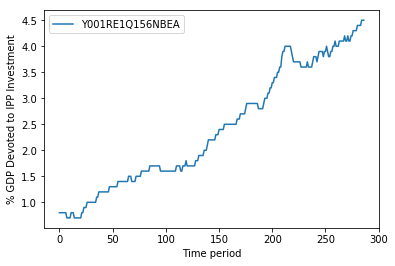

__(b):__ What has happened to the share of GDP devoted to investment in IPP over the last 60 years. What might explain this change?

__(c):__ Lets use the share of GDP devoted to investment in IPP as a proxy for the amount of effort that goes into research and development in a country, or $\bar{\ell}$. The assumption in the Romer model is that the research share is constant. Please relax this assumption and incorporate a dynamic research share parameter $\bar{\ell}_{t}$ into the Romer model. Use the data you obtained in part __(b)__ to create a series for your new dynamic variable $\bar{\ell}_{t}$ and simluate all 287 quarters of data found in the of data using $\bar{A_0} = 100$, $\bar{z} = \frac{1}{3000}$, $\alpha=1/3$ and $\bar{L} = 1000$. Please create a plot of GDP per capital and the growth of GPD per capital over the post WWII era.

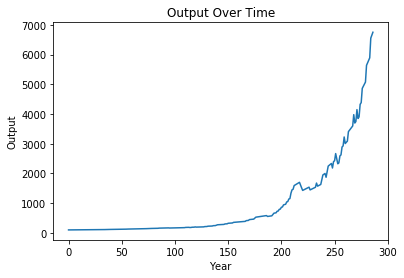

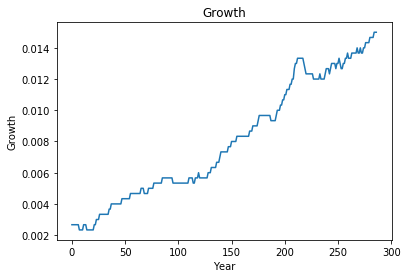

In [73]:
# Assign the data from FRED as l(t)
l = data['Y001RE1Q156NBEA'] / 100

# Preallocate arrays to be filled in later

new_output = np.zeros(287)
growth = np.zeros(287)
year2 = np.arange(0, new_output.size, 1) # This is just used to make a nice array for the x axis

# Assign parameter values 
A_0 = 100
z = 1/3000
L = 1000

# Using a for loop calculate output and growth rates


# Create a plot of output 
    

# Create a plot of growth



__(d)__ Compare the growth rate of GDP per capita under this new assumption versus the fixed parameter version of the model.  What are the strenghts and weaknesses of each model? Please justify your answers.